# Bike Sharing Assignment [Case Study]

### <span style="color:salmon">Problem Statement:</span>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### <span style="color:salmon">Business Objective:</span>

- Task is to **create a model predicting shared bike demand using the existing independent variables**. 

- The management will utilize this model to comprehend how demand varies across different features, allowing strategic adjustments to meet demand levels and fulfill customer expectations. 

- Additionally, the model serves as a valuable tool for the management to grasp the dynamics of demand in a new market.

# Implementation Strategy

1. **Understanding Data**
2. **EDA**
3. **Data Preparation**
4. **Building a Model for Prediction**
5. **Linear regression assumptions proof**
6. **Model Prediction on test data**
7. **Calculating R squared values**
8. **Conclusion**

# <span style="color:blue"> 1. Understanding Data </span>

### Day.csv Dataset

- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit** : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [15]:
# Creating the actual names for the columns. As this values will be used in displaying in reports.

bike_sharing_real_columnNames = { 
  "instant": "Record Index",
  "dteday": "Date",
  "season": "Season",
  "yr": "Year",
  "mnth": "Month",
  "holiday": "Holiday",
  "weekday": "Day of the Week",
  "workingday": "Working Day",
  "weathersit": "Weather Situation",
  "temp": "Temperature in Celsius",
  "atemp": "Feeling Temperature in Celsius",
  "hum": "Humidity",
  "windspeed": "Wind Speed",
  "casual": "Count of Casual Users",
  "registered": "Count of Registered Users",
  "cnt": "Count of Total Rental Bikes"
}

<span style="color:purple"> **Target Variable: cnt** </span>

### Importing Libraries

In [16]:
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Data Sourcing

In [17]:
bike = pd.read_csv("day.csv", sep=",", low_memory=False)

In [18]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Data Summary

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [20]:
bike.shape

(730, 16)

-  **Total intial columns in dataset: 730**
-  **Total initial rows in dataset: 16**

In [21]:
bike.isnull().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- **No Null values found in the dataset**

In [22]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- **There is NO header rows found**.

In [23]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


- **There is NO Footer rows found**.

In [24]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [25]:
# Identify columns that are unique in nature
unique_columns = [col for col in bike.columns if bike[col].nunique() == len(bike[col])]
unique_columns

['instant', 'dteday']

In [26]:
# In a different way - Checking the Value Counts for entire Data Frame. Means, calculating the UNIQUE values across all columns in Dataframe. 
bike.value_counts(ascending=False).tail(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp      atemp     hum    windspeed  casual  registered  cnt 
730      31-12-2019  1       1   12    0        1        1           2           8.849153  11.17435  57.75  10.374682  439     2290        2729    1
Name: count, dtype: int64

- **We found that there are two columns ('instant', 'dteday') which are unique in nature. Hence, this can be DROPPED**. 

In [27]:
bike.drop(unique_columns, axis=1, inplace=True)
bike.shape

(730, 14)

- **'instant' and 'dteday' columns are now dropped.**

In [28]:
# Check for duplicate rows
duplicate_rows = bike[bike.duplicated()]
duplicate_rows.count()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- **No Duplicate rows found !!**

- **'cnt' column value is a sum of 'casual' & 'registered' values. So instead, cnt can be used directly**. 
- **Hence, 'casual' & 'registered' columns can be dropped**. 

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


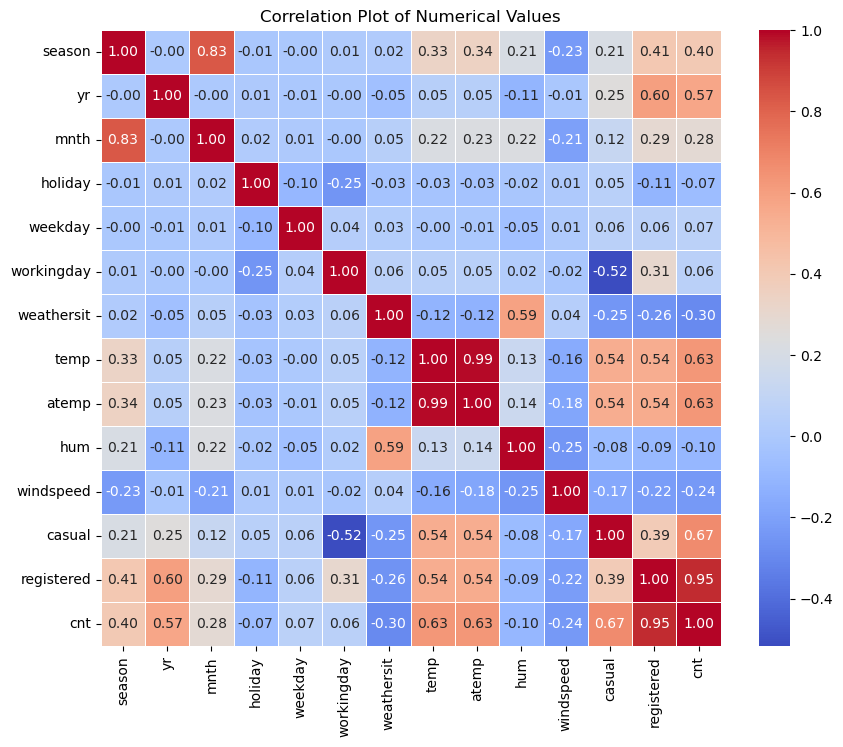

In [30]:
numerical_df = bike.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a correlation plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot of Numerical Values')
plt.show()


- **Registered and cacual** are the columns which has highest level of corelation with the target variable. 

In [31]:
bike.drop(['casual', 'registered'], axis=1, inplace=True)
bike.shape

(730, 12)

- **'casual' and 'registered' columns are now dropped. Total 12 columns left.**

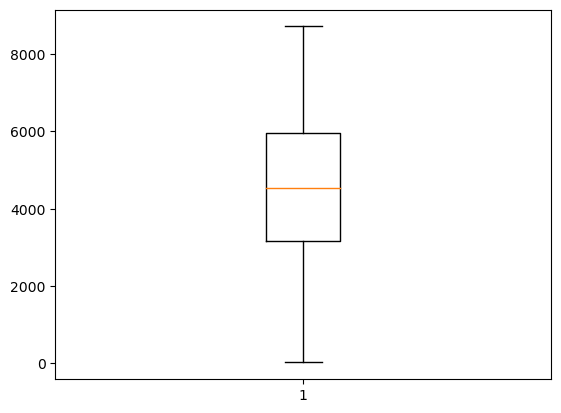

In [32]:
plt.boxplot(bike['cnt'])
plt.show()

- **Likewise, other data also seen in permissible range. So, no need to remove any outliers**. 

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# <span style="color:blue"> 2. EDA </span>

**Few columns in the bike dataset like season, weathersit & month arw categorical variables but used as numeric ones. This can be converted into categorical values for Performing EDA !!**

In [34]:
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


**As we converted above 3 variables into categorical variables. We need to add the respective values to display it in our graphs.**

**To get the actual categorical values, we can refer the column description in the beginning of the file.** 

In [35]:
bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike.value_counts("weekday")

weekday
mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: count, dtype: int64

In [36]:
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike.value_counts("season")

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [37]:
bike.value_counts("weathersit")

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [38]:
bike.weathersit.replace({1:'clear',2:'cloudy',3:'snow',4:'rainy'},inplace = True)
bike.value_counts("weathersit")

weathersit
clear     463
cloudy    246
snow       21
Name: count, dtype: int64

In [39]:
bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike.value_counts("mnth")

mnth
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: count, dtype: int64

In [40]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [41]:
# Finally validate the Data Type
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


- **All Data seems to be set now. Let's perform EDA.**

### Univariate analysis

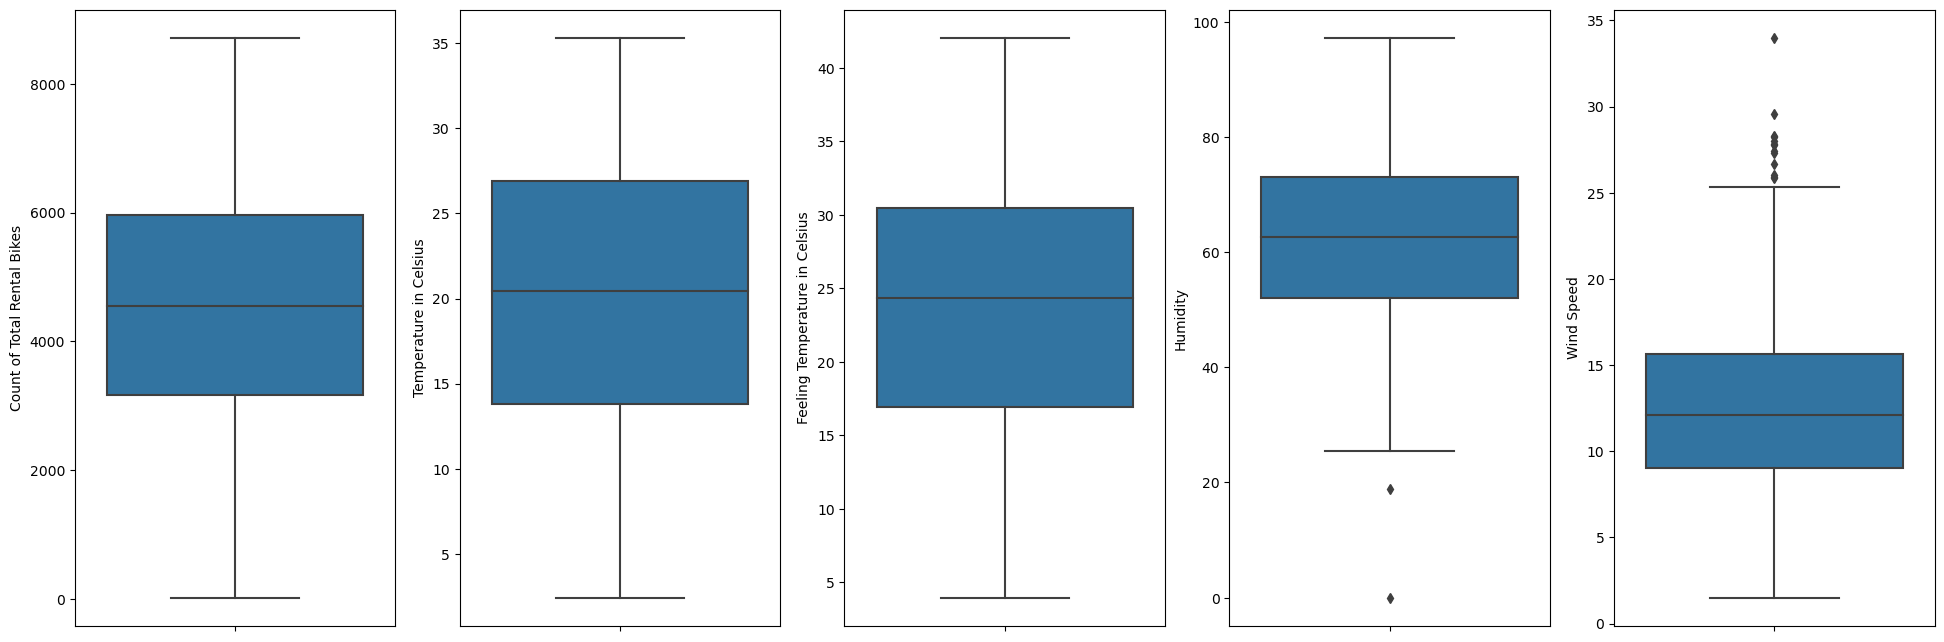

In [42]:
# Let's see if any outliers present in the numerical values. 
numeric_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(24,8))

k = 1
for col in numeric_columns:
    plt.subplot(1,5,k)    
    sns.boxplot(y=col, data=bike)
    plt.ylabel(bike_sharing_real_columnNames[col])
    k+=1

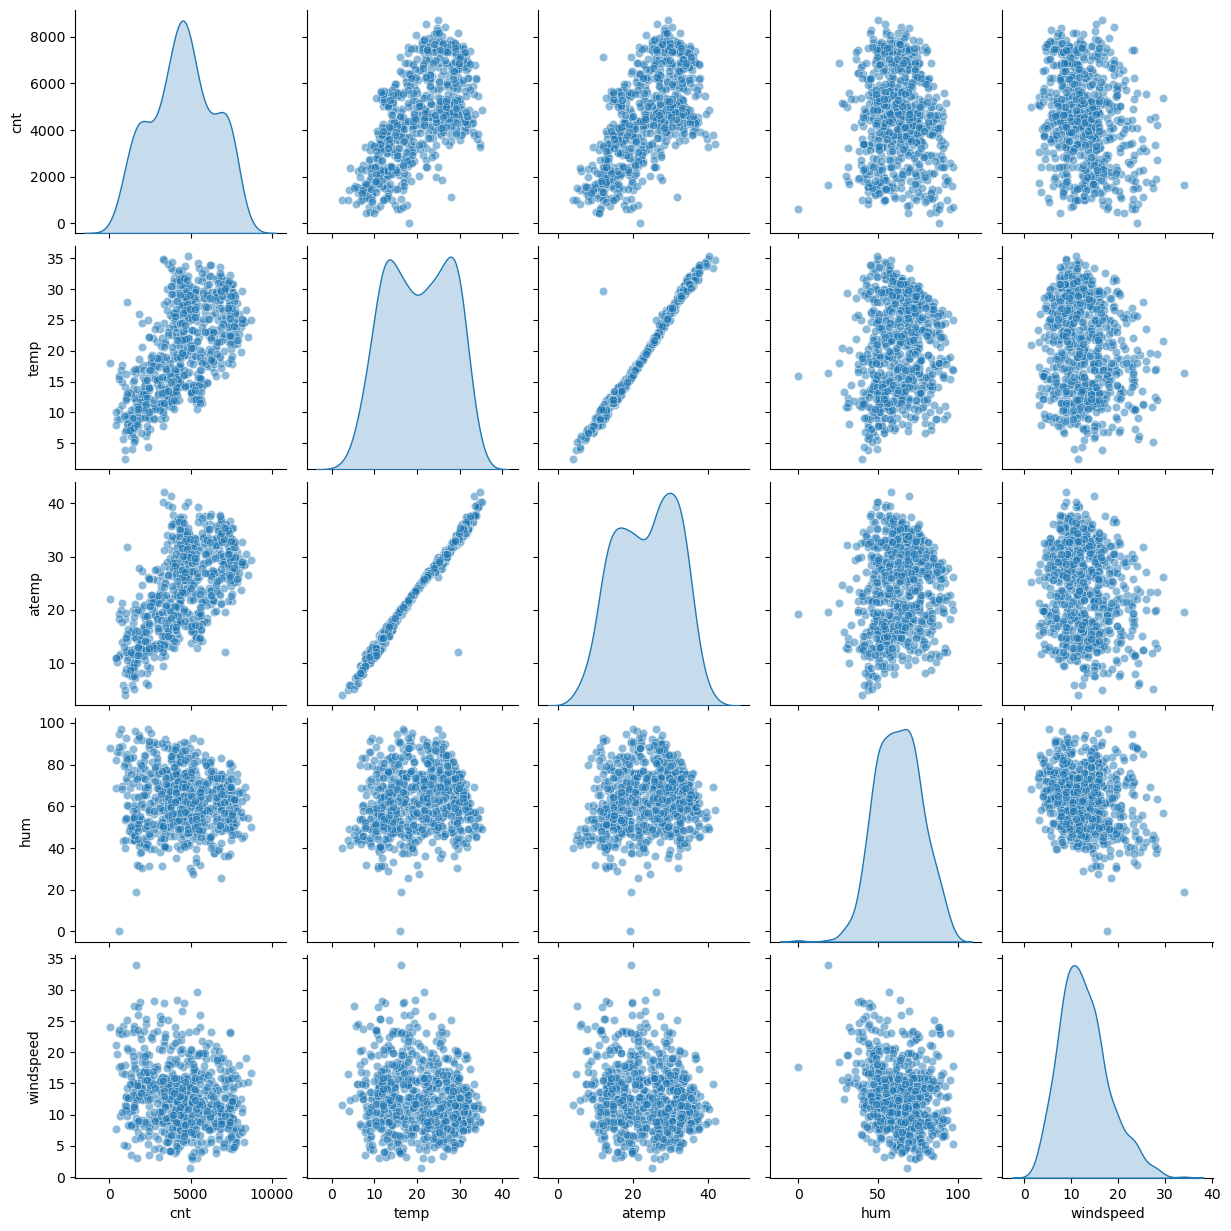

In [43]:
# Let's create pairplots to better visualize the potential linear dependence of 'cnt' on its independent variables.

# Set a custom color palette for better aesthetics
custom_palette = sns.color_palette("viridis", as_cmap=True)

sns.pairplot(data=bike,vars=numeric_columns, height=2.5, palette=custom_palette, markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

Text(0.5, 1.0, 'Workingday')

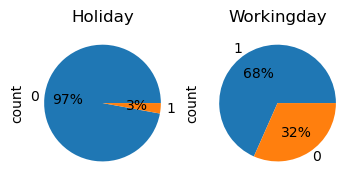

In [44]:
plt.subplot(131)
bike['holiday'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Holiday')
plt.subplot(132)
bike['workingday'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Workingday')

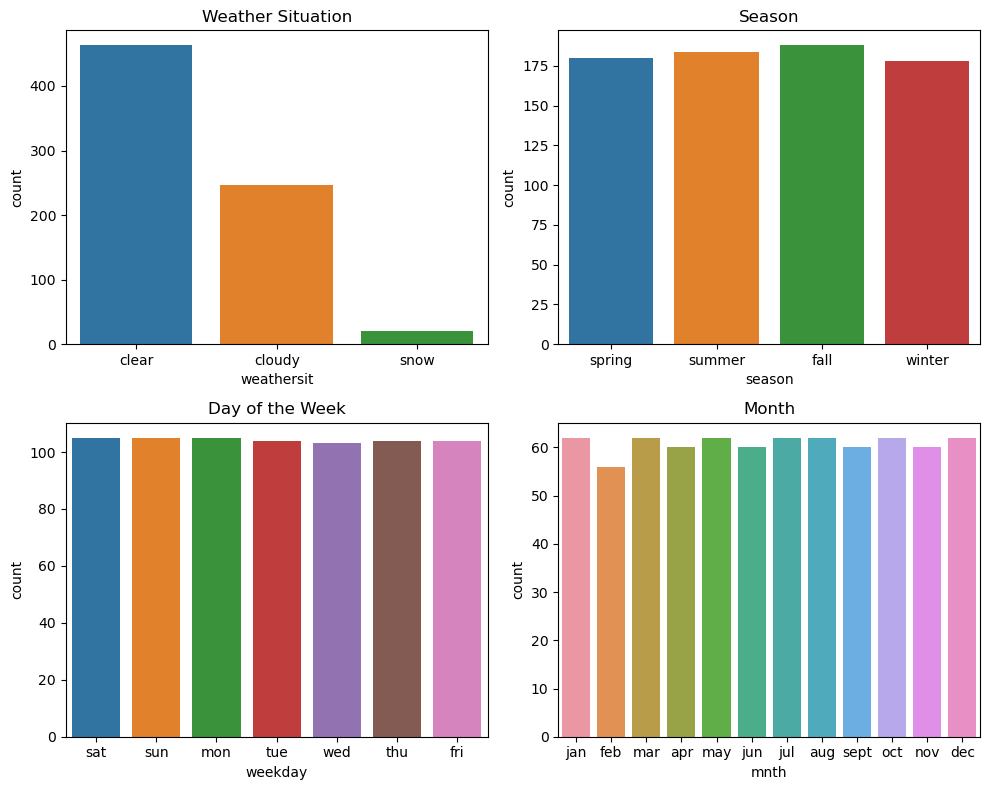

In [45]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.countplot(data = bike, x = 'weathersit', ax=axes[0,0])
axes[0,0].set_title(bike_sharing_real_columnNames['weathersit'])

sns.countplot(data = bike, x = 'season', ax=axes[0,1])
axes[0,1].set_title(bike_sharing_real_columnNames['season'])

sns.countplot(data = bike, x = 'weekday', ax=axes[1,0])
axes[1,0].set_title(bike_sharing_real_columnNames['weekday'])

sns.countplot(data = bike, x = 'mnth', ax=axes[1,1])
axes[1,1].set_title(bike_sharing_real_columnNames['mnth'])

plt.tight_layout()
plt.show()


**Inferences from Univeriate Analysis**
1. The datset doesnt contain much outliers which needs to be removed. 
2. We can see that linerar dependency between 'cnt' with 'temp' and 'atemp'. 
3. Also, temp and atemp hold a strong linearity with them.
4. dataset has less holidays. Also, less number of non working days compare to working one. 
5. More bikes are used when the weather is described as clear, with few clouds or partly cloudy. Other variables show similar values.

### Bivariate analysis

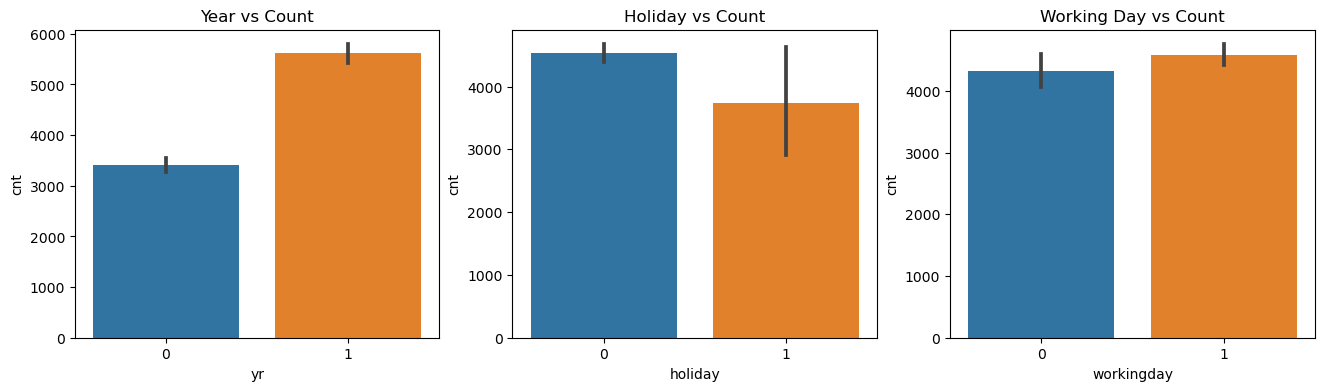

In [46]:
plt.figure(figsize=[16, 4])

plt.subplot(1, 3, 1)
sns.barplot(x='yr', y='cnt', data=bike)
plt.title('Year vs Count')

plt.subplot(1, 3, 2)
sns.barplot(x='holiday', y='cnt', data=bike)
plt.title('Holiday vs Count')

plt.subplot(1, 3, 3)
sns.barplot(x='workingday', y='cnt', data=bike)
plt.title('Working Day vs Count')

plt.show()


**Observation**
1. The plots reveal an upward trend in the number of bike users from the year 2018 (0) to the year 2019 (1).
2. There is a higher user count during holidays (0) compared to non-holidays (1).
3. The difference in user counts for BoomBike between working days (1) and non-working days (0) is minimal.

**Boxplot for Categorical Variables:**

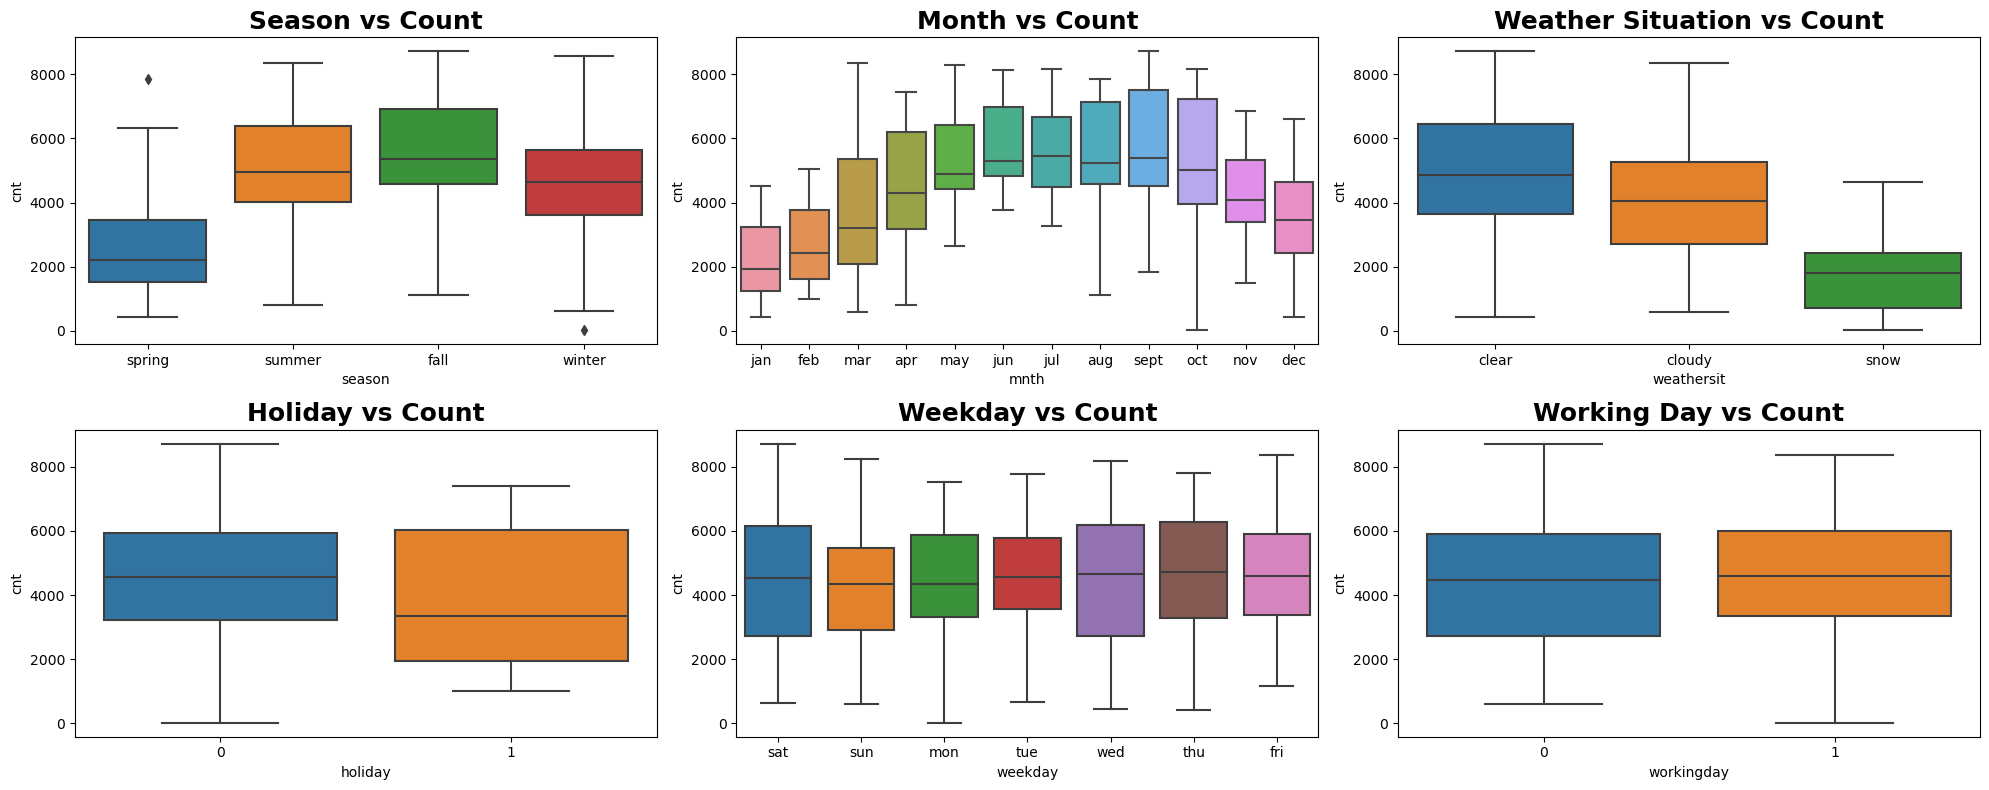

In [47]:
plt.figure(figsize=(20, 8))

# Subplot 1: 'season' vs 'cnt'
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.title('Season vs Count', fontweight='bold', fontsize=18)

# Subplot 2: 'mnth' vs 'cnt'
plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.title('Month vs Count', fontweight='bold', fontsize=18)

# Subplot 3: 'weathersit' vs 'cnt'
plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('Weather Situation vs Count', fontweight='bold', fontsize=18)

# Subplot 4: 'holiday' vs 'cnt'
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.title('Holiday vs Count', fontweight='bold', fontsize=18)

# Subplot 5: 'weekday' vs 'cnt'
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.title('Weekday vs Count', fontweight='bold', fontsize=18)

# Subplot 6: 'workingday' vs 'cnt'
plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.title('Working Day vs Count', fontweight='bold', fontsize=18)

plt.tight_layout()
plt.show()


**Observations**
1. Seasons (Top Left): Outliers are visible, with Fall having the highest median demand and Spring the lowest.
2. Months (Top Middle): Monthly demand fluctuates, indicating variations throughout the year.
3. Weather Situations (Top Right): Clear weather exhibits higher median demand compared to Mist/Cloudy and Light Snow/Rain.
4. Holidays (Bottom Left): Non-holidays show slightly higher median demand than holidays.
4. Weekdays (Bottom Middle): Demand remains relatively consistent across all weekdays.
5. Working Days (Bottom Right): Working days have higher median demand compared to non-working days.

# <span style="color:blue"> 3. Data Preparation </span>

In [48]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [49]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


In [50]:
# Generating dummy variables for four categorical variables: 'mnth', 'weekday', 'season', and 'weathersit'.
df = pd.get_dummies(bike, drop_first=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_summer      730 non-null    bool   
 9   season_fall        730 non-null    bool   
 10  season_winter      730 non-null    bool   
 11  mnth_feb           730 non-null    bool   
 12  mnth_mar           730 non-null    bool   
 13  mnth_apr           730 non-null    bool   
 14  mnth_may           730 non-null    bool   
 15  mnth_jun           730 non-null    bool   
 16  mnth_jul           730 non

In [52]:
# Identify boolean columns
bool_columns = df.select_dtypes(include='bool').columns

# Convert True to 1 and False to 0 for boolean columns
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_summer      730 non-null    int32  
 9   season_fall        730 non-null    int32  
 10  season_winter      730 non-null    int32  
 11  mnth_feb           730 non-null    int32  
 12  mnth_mar           730 non-null    int32  
 13  mnth_apr           730 non-null    int32  
 14  mnth_may           730 non-null    int32  
 15  mnth_jun           730 non-null    int32  
 16  mnth_jul           730 non

In [53]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


### Create Train and Test Datasets

In [56]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Divide the train and test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)
df_train.shape, df_test.shape

((547, 30), (183, 30))

In [58]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,1,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,1,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,0,0,0,0,1,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,0,0,...,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,1,...,0,0,0,0,1,0,0,0,0,0


In [60]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382,0.244973,0.252285,...,0.082267,0.087751,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.349177,0.027422
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008,0.430465,0.434722,...,0.275022,0.283192,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.477146,0.163460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


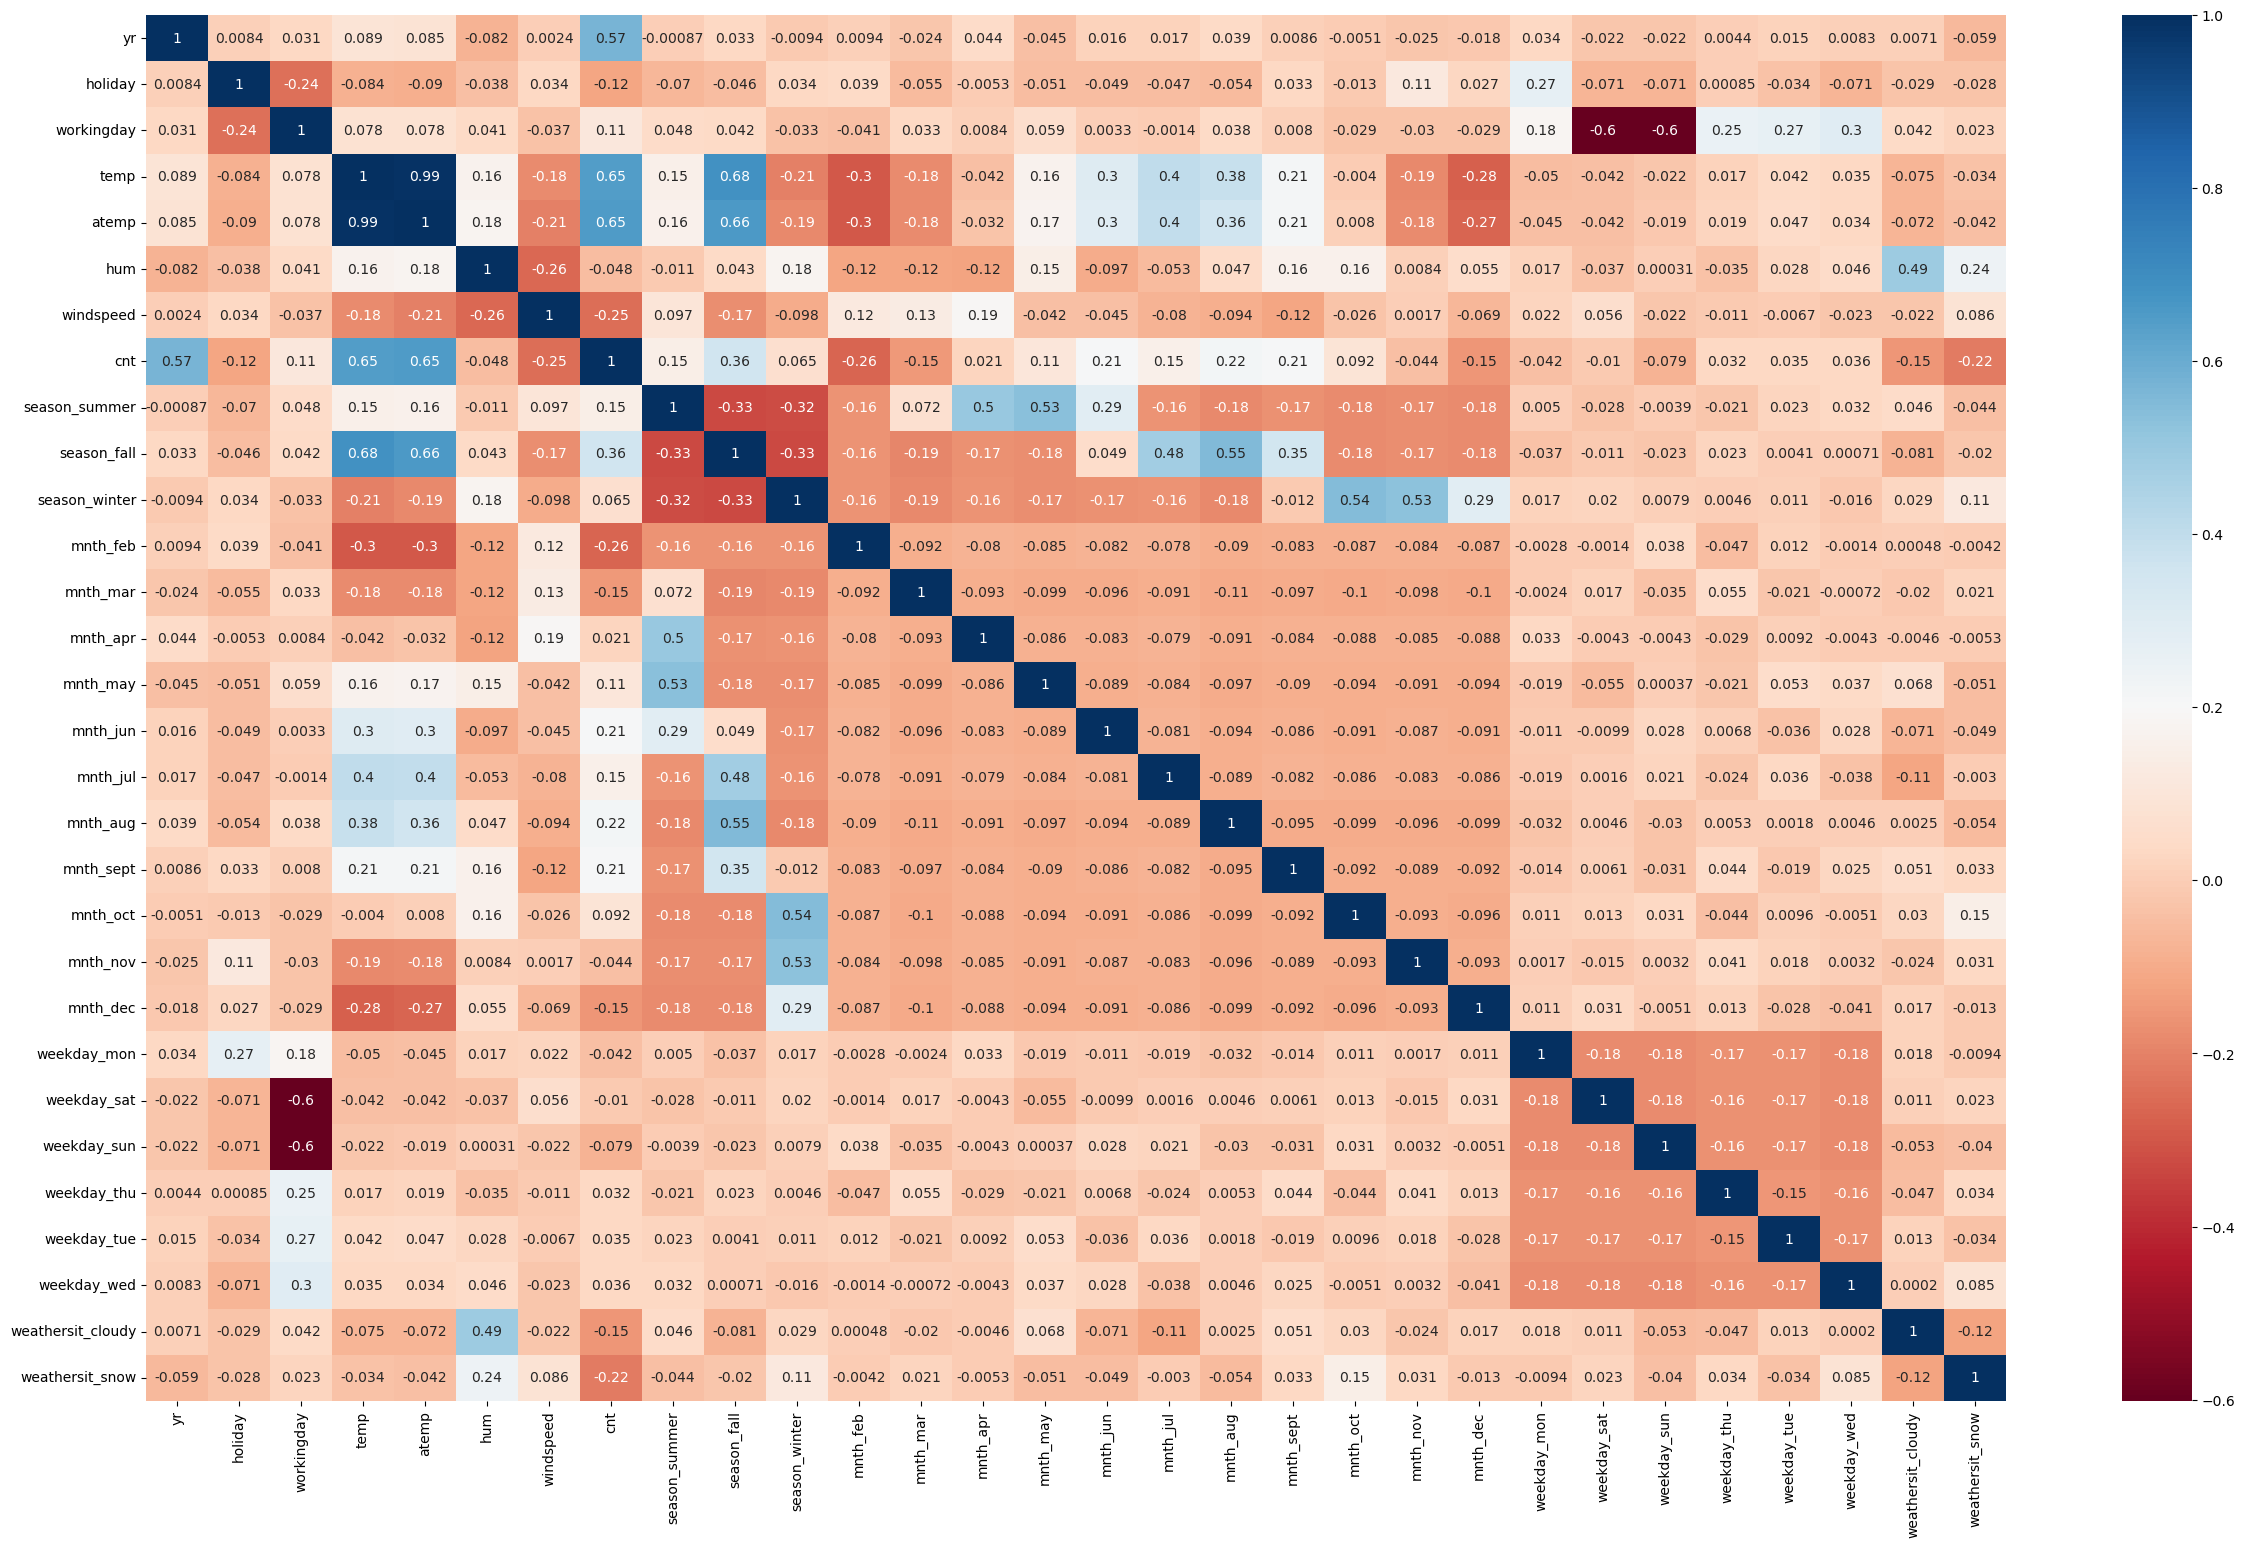

In [61]:
# Plotting a correlation matrix
plt.figure(figsize = (30, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

In [62]:
# Seperating X and Y training variables

y_train=df_train.pop('cnt')
X_train=df_train


In [63]:
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

In [64]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0,0,1,...,1,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,1,0,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0,0,0,...,0,0,0,0,0,0,1,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0,0,0,...,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
y_train.shape

(547,)

# <span style="color:blue"> 4. Building a Model for Prediction </span>

## Model 1

In [66]:
# Building a model with all features using statsmodels :

X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const                0.150386
yr                   0.230799
holiday             -0.022558
workingday           0.078823
temp                 0.391615
atemp                0.054732
hum                 -0.146786
windspeed           -0.177329
season_summer        0.095992
season_fall          0.051909
season_winter        0.166105
mnth_feb             0.027713
mnth_mar             0.060681
mnth_apr             0.055422
mnth_may             0.076799
mnth_jun             0.068907
mnth_jul             0.024709
mnth_aug             0.079394
mnth_sept            0.141909
mnth_oct             0.065041
mnth_nov             0.011734
mnth_dec             0.005368
weekday_mon         -0.023312
weekday_sat          0.074136
weekday_sun          0.019984
weekday_thu         -0.010611
weekday_tue         -0.021888
weekday_wed         -0.008645
weathersit_cloudy   -0.059812
weathersit_snow     -0.259461
dtype: float64

In [67]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.86e-198
Time:                        20:26:32   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1504      0.022      6.709      0.000       0.106       0.194
yr                    0.2308      0.008     30.023      0.000       0.216       0.246
holiday              -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday            0.0788      0.010      7.746      0.000       0.059       0.099
temp                  0.3916      0.138      2.838      0.005       0.121       0.663
atemp                 0.0547      0.136      0.404      0.686      -0.211       0.321
hum                  -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed            -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_summer         0.0960      0.023      4.210      0.000       0.051       0.141
season_fall           0.0519      0.028      1.828      0.068      -0.004       0.108
season_winter         0.1661      0.024      7.001      0.000       0.119       0.213
mnth_feb              0.0277      0.019      1.449      0.148      -0.010       0.065
mnth_mar              0.0607      0.021      2.880      0.004       0.019       0.102
mnth_apr              0.0554      0.032      1.720      0.086      -0.008       0.119
mnth_may              0.0768      0.035      2.222      0.027       0.009       0.145
mnth_jun              0.0689      0.037      1.878      0.061      -0.003       0.141
mnth_jul              0.0247      0.042      0.595      0.552      -0.057       0.106
mnth_aug              0.0794      0.039      2.010      0.045       0.002       0.157
mnth_sept             0.1419      0.035      4.045      0.000       0.073       0.211
mnth_oct              0.0650      0.032      2.052      0.041       0.003       0.127
mnth_nov              0.0117      0.030      0.387      0.699      -0.048       0.071
mnth_dec              0.0054      0.024      0.227      0.821      -0.041       0.052
weekday_mon          -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_sat           0.0741      0.012      6.386      0.000       0.051       0.097
weekday_sun           0.0200      0.012      1.688      0.092      -0.003       0.043
weekday_thu          -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_tue          -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_wed          -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_cloudy    -0.0598      0.010     -6.002      0.000      -0.079      -0.040
weathersit_snow      -0.2595      0.026     -9.971      0.000      -0.311      -0.208
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.688
Skew:   

### Observation
1. In this context, the observation that all adjusted R-Square values are 0.856 indicates a commendable performance. Let's explore the potential to reduce the number of independent features.
2. Considering the count of predictor variables is approximately 30, manually eliminating insignificant variables becomes impractical.
3. We will employ a hybrid approach involving Recursive Feature Elimination (RFE) alongside manual selection to eliminate insignificant variables.

In [68]:
# Lets run RFE and reduce the number of independent variables to 15.
# Use hybrid mechanism

In [69]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 5),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 4),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_cloudy', True, 1),
 ('weathersit_snow', True, 1)]

In [70]:
# RFE support Variables - Significant for the model
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat', 'weathersit_cloudy',
       'weathersit_snow'],
      dtype='object')

In [71]:
# RFE not Supported Variables - Insignificant for the model
print(X_train.columns[~rfe.support_])
print(len(X_train.columns[~rfe.support_]))

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')
14


In [72]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]

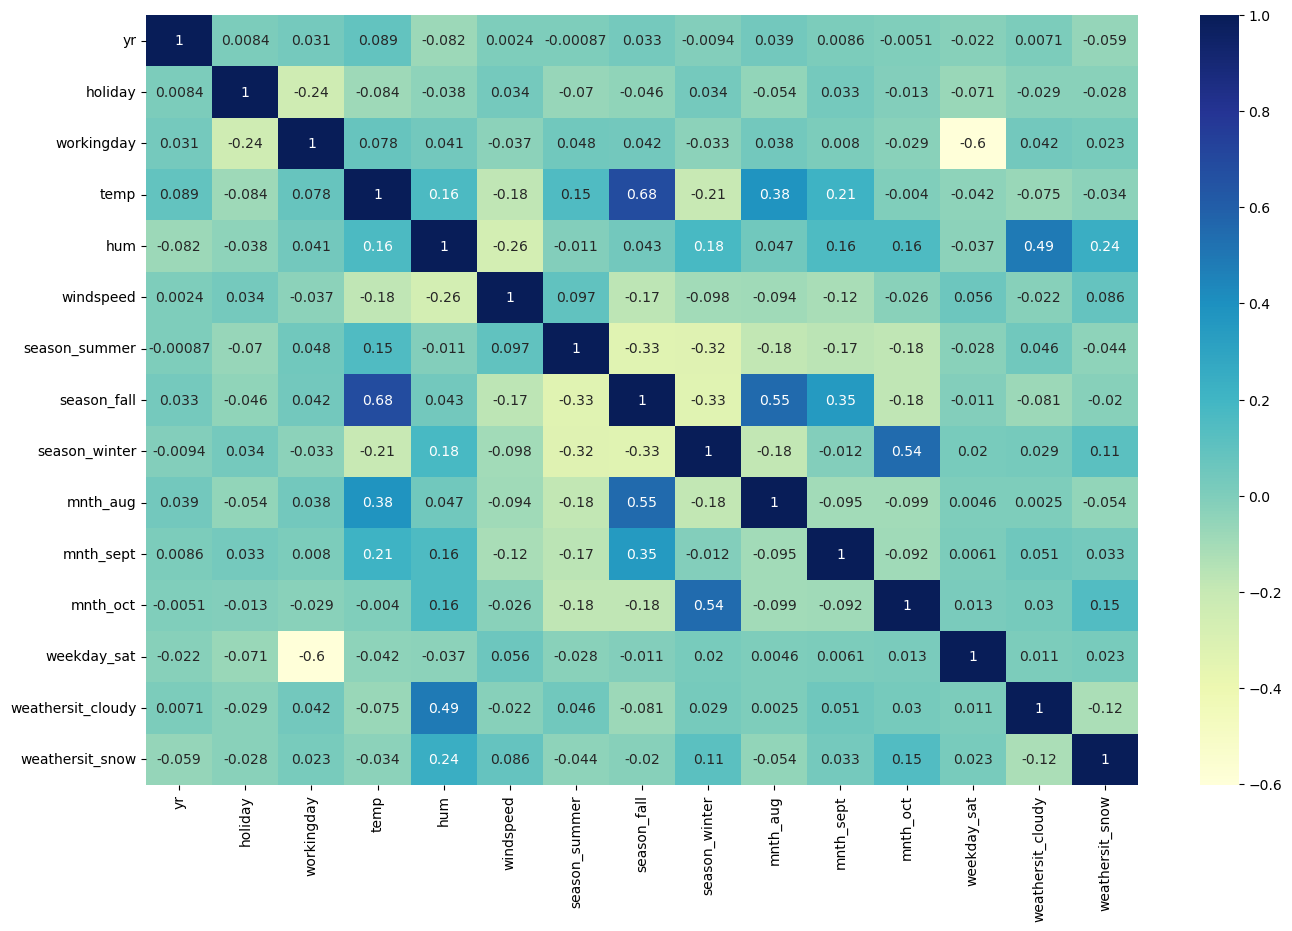

In [73]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [74]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_cloudy,weathersit_snow
311,0,0,1,0.435124,0.743667,0.057471,0,0,1,0,0,0,0,0,0
523,1,0,1,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.737917,0.659615,0,0,0,0,0,0,0,1,0
413,1,0,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,1,0,0
253,0,0,0,0.740406,0.735509,0.156398,0,1,0,0,1,0,0,0,0


In [75]:
X_train_rfe.shape

(547, 15)

## Model 2

In [76]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [77]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,23.47
4,hum,16.96
7,season_fall,7.77
2,workingday,4.89
5,windspeed,3.89
6,season_summer,3.44
8,season_winter,2.85
13,weathersit_cloudy,2.15
0,yr,2.04
9,mnth_aug,1.87


1. VIF < 5: Generally considered low, indicating a low level of multicollinearity.
2. 5 < VIF < 10: Moderate multicollinearity.
3. VIF > 10: High multicollinearity, and this is often considered problematic.

In [78]:
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.90e-209
Time:                        20:26:42   Log-Likelihood:                 562.51
No. Observations:                 547   AIC:                            -1093.
Df Residuals:                     531   BIC:                            -1024.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1905      0.027      6.995      0.000       0.137       0.244
yr                    0.2282      0.008     29.882      0.000       0.213       0.243
holiday              -0.0711      0.025     -2.864      0.004      -0.120      -0.022
workingday            0.0458      0.011      4.261      0.000       0.025       0.067
temp                  0.4978      0.032     15.651      0.000       0.435       0.560
hum                  -0.1644      0.036     -4.578      0.000      -0.235      -0.094
windspeed            -0.1786      0.024     -7.394      0.000      -0.226      -0.131
season_summer         0.1226      0.014      8.699      0.000       0.095       0.150
season_fall           0.0336      0.021      1.611      0.108      -0.007       0.075
season_winter         0.1484      0.013     11.562      0.000       0.123       0.174
mnth_aug              0.0470      0.017      2.789      0.005       0.014       0.080
mnth_sept             0.1167      0.016      7.098      0.000       0.084       0.149
mnth_oct              0.0472      0.017      2.858      0.004       0.015       0.080
weekday_sat           0.0532      0.014      3.879      0.000       0.026       0.080
weathersit_cloudy    -0.0580      0.010     -5.849      0.000      -0.077      -0.038
weathersit_snow      -0.2538      0.026     -9.869      0.000      -0.304      -0.203
==============================================================================
Omnibus:                       83.546   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.343
Skew:                          -0.756   Prob(JB):                     4.30e-50
Kurtosis:                       5.773   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
1. weekday_sat has P value > 5%. In this case, it seem to be irrelevent and can be dropped. 

In [79]:
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_cloudy,weathersit_snow
311,0,0,0.435124,0.743667,0.057471,0,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,1,0,0
253,0,0,0.740406,0.735509,0.156398,0,1,0,0,1,0,0,0,0


## Model 3

In [80]:
calculateVIF(X_train_rfe2)

,Features,VIF
2,temp,23.26
3,hum,15.08
6,season_fall,7.77
4,windspeed,3.70
5,season_summer,3.44
7,season_winter,2.85
12,weathersit_cloudy,2.14
0,yr,2.02
8,mnth_aug,1.87
10,mnth_oct,1.67


In [81]:
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.88e-206
Time:                        20:26:45   Log-Likelihood:                 553.31
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     532   BIC:                            -1012.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2284      0.026      8.738      0.000       0.177       0.280
yr                    0.2288      0.008     29.493      0.000       0.214       0.244
holiday              -0.1078      0.024     -4.561      0.000      -0.154      -0.061
temp                  0.5020      0.032     15.542      0.000       0.439       0.565
hum                  -0.1716      0.036     -4.707      0.000      -0.243      -0.100
windspeed            -0.1785      0.025     -7.273      0.000      -0.227      -0.130
season_summer         0.1228      0.014      8.578      0.000       0.095       0.151
season_fall           0.0325      0.021      1.535      0.125      -0.009       0.074
season_winter         0.1492      0.013     11.444      0.000       0.124       0.175
mnth_aug              0.0492      0.017      2.870      0.004       0.016       0.083
mnth_sept             0.1185      0.017      7.091      0.000       0.086       0.151
mnth_oct              0.0447      0.017      2.660      0.008       0.012       0.078
weekday_sat           0.0158      0.011      1.475      0.141      -0.005       0.037
weathersit_cloudy    -0.0547      0.010     -5.450      0.000      -0.074      -0.035
weathersit_snow      -0.2465      0.026     -9.456      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       81.314   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.008
Skew:                          -0.774   Prob(JB):                     1.66e-43
Kurtosis:                       5.499   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# From above we can see that weekday_sat is having high pValue 0.482>0.05  and hum VIP is 14.57>5.
# Lets drop weekday_sat

In [83]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_sat"], axis = 1)
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weathersit_cloudy,weathersit_snow
311,0,0,0.435124,0.743667,0.057471,0,0,1,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,1,0,0,1,0,0,0


In [84]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,temp,23.26
3,hum,15.03
6,season_fall,7.77
4,windspeed,3.65
5,season_summer,3.44
7,season_winter,2.85
11,weathersit_cloudy,2.14
0,yr,2.02
8,mnth_aug,1.87
10,mnth_oct,1.67


## Model 4

In [85]:
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)
# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.47e-207
Time:                        20:26:48   Log-Likelihood:                 552.19
No. Observations:                 547   AIC:                            -1076.
Df Residuals:                     533   BIC:                            -1016.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2323      0.026      8.921      0.000       0.181       0.283
yr                    0.2285      0.008     29.435      0.000       0.213       0.244
holiday              -0.1105      0.024     -4.682      0.000      -0.157      -0.064
temp                  0.5010      0.032     15.496      0.000       0.437       0.564
hum                  -0.1740      0.036     -4.773      0.000      -0.246      -0.102
windspeed            -0.1770      0.025     -7.210      0.000      -0.225      -0.129
season_summer         0.1227      0.014      8.560      0.000       0.095       0.151
season_fall           0.0327      0.021      1.540      0.124      -0.009       0.074
season_winter         0.1495      0.013     11.459      0.000       0.124       0.175
mnth_aug              0.0497      0.017      2.897      0.004       0.016       0.083
mnth_sept             0.1190      0.017      7.120      0.000       0.086       0.152
mnth_oct              0.0448      0.017      2.668      0.008       0.012       0.078
weathersit_cloudy    -0.0542      0.010     -5.400      0.000      -0.074      -0.035
weathersit_snow      -0.2455      0.026     -9.409      0.000      -0.297      -0.194
==============================================================================
Omnibus:                       76.498   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.900
Skew:                          -0.716   Prob(JB):                     7.85e-43
Kurtosis:                       5.541   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# we can see that Adj. R-squire is 0.846 and pvalue is less than 0.05 for every features.
# VIP for hum > 5.so Lets frist remove the hum.

In [87]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

,yr,holiday,temp,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weathersit_cloudy,weathersit_snow
311,0,0,0.435124,0.057471,0,0,1,0,0,0,0,0
523,1,0,0.735215,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.156398,0,1,0,0,1,0,0,0


In [88]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,14.14
5,season_fall,7.29
4,season_summer,3.38
3,windspeed,3.25
6,season_winter,2.74
0,yr,2.02
7,mnth_aug,1.87
9,mnth_oct,1.65
8,mnth_sept,1.52
10,weathersit_cloudy,1.52


## Model 5

In [89]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.20e-203
Time:                        20:26:52   Log-Likelihood:                 540.75
No. Observations:                 547   AIC:                            -1055.
Df Residuals:                     534   BIC:                            -999.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1338      0.016      8.262      0.000       0.102       0.166
yr                    0.2330      0.008     29.638      0.000       0.218       0.248
holiday              -0.1110      0.024     -4.608      0.000      -0.158      -0.064
temp                  0.4671      0.032     14.517      0.000       0.404       0.530
windspeed            -0.1435      0.024     -5.978      0.000      -0.191      -0.096
season_summer         0.1261      0.015      8.634      0.000       0.097       0.155
season_fall           0.0449      0.021      2.091      0.037       0.003       0.087
season_winter         0.1450      0.013     10.919      0.000       0.119       0.171
mnth_aug              0.0444      0.017      2.546      0.011       0.010       0.079
mnth_sept             0.1094      0.017      6.461      0.000       0.076       0.143
mnth_oct              0.0430      0.017      2.511      0.012       0.009       0.077
weathersit_cloudy    -0.0818      0.008     -9.771      0.000      -0.098      -0.065
weathersit_snow      -0.2929      0.025    -11.901      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       76.941   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.045
Skew:                          -0.719   Prob(JB):                     2.69e-43
Kurtosis:                       5.557   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
1. The Model Summary Report indicates that all the p-values for the respective features are below 0.05.
2. As a heuristic approach, when the VIF value of any predictor is between 5 and 10, it is recommended to scrutinize the variable from a business perspective, analyze any outliers, and consider dropping the feature if the VIF exceeds 10.
3. Therefore, based on the model summary, further analysis and adjustments can be made.

# <span style="color:blue"> 5. Linear regression assumptions proof </span>

In [90]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

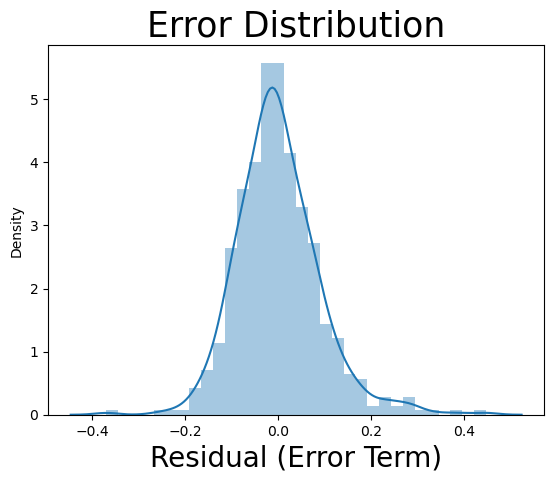

In [91]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 


In [92]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


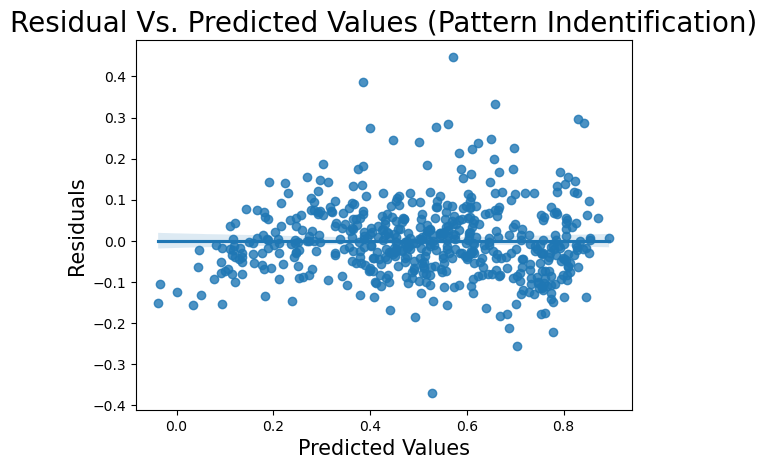

In [93]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [94]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

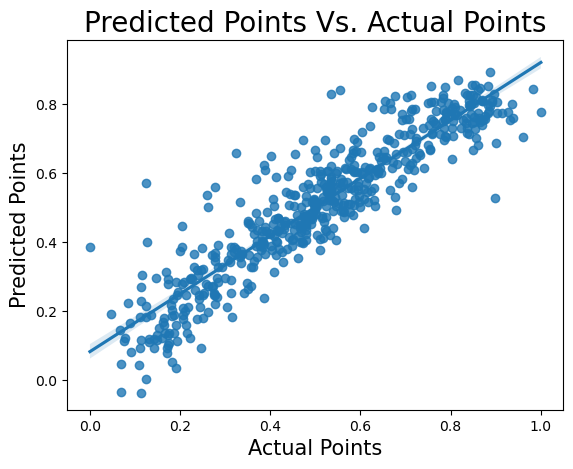

In [95]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [96]:
# we can see that variance is  similar from both end of fitted line.

In [97]:
# Multicorrelation
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,14.14
5,season_fall,7.29
4,season_summer,3.38
3,windspeed,3.25
6,season_winter,2.74
0,yr,2.02
7,mnth_aug,1.87
9,mnth_oct,1.65
8,mnth_sept,1.52
10,weathersit_cloudy,1.52


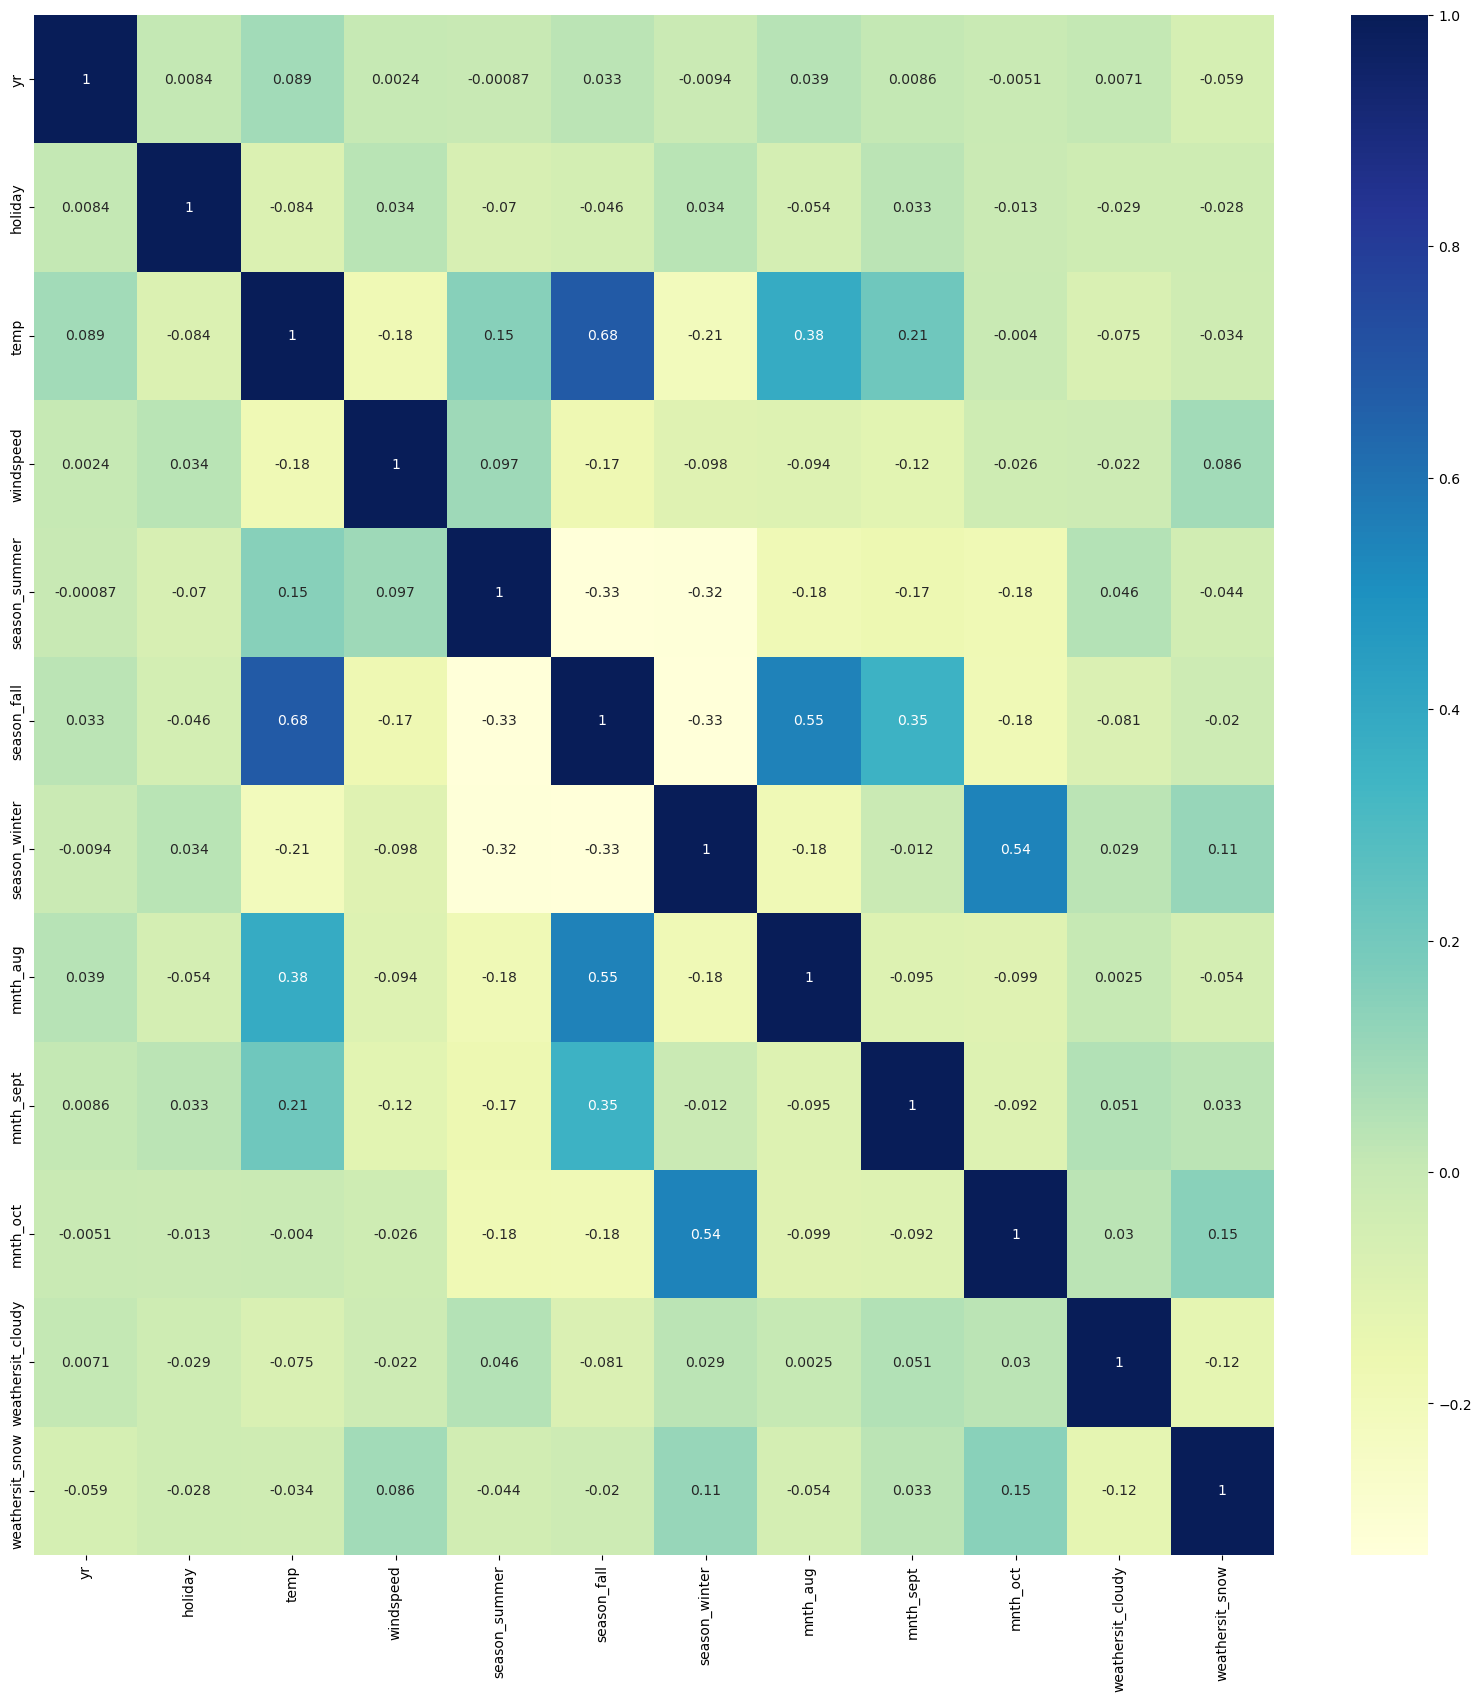

In [98]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [99]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

# <span style="color:blue"> 6. Model Prediction on Test Data </span>

In [100]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [101]:
df_test.shape

(183, 30)

In [102]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_snow
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.273224,0.273224,...,0.081967,0.076503,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.300546,0.032787
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.446837,0.446837,...,0.275067,0.266530,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.459754,0.178567
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 183 non-null    int64  
 1   holiday            183 non-null    int64  
 2   workingday         183 non-null    int64  
 3   temp               183 non-null    float64
 4   atemp              183 non-null    float64
 5   hum                183 non-null    float64
 6   windspeed          183 non-null    float64
 7   season_summer      183 non-null    int32  
 8   season_fall        183 non-null    int32  
 9   season_winter      183 non-null    int32  
 10  mnth_feb           183 non-null    int32  
 11  mnth_mar           183 non-null    int32  
 12  mnth_apr           183 non-null    int32  
 13  mnth_may           183 non-null    int32  
 14  mnth_jun           183 non-null    int32  
 15  mnth_jul           183 non-null    int32  
 16  mnth_aug           183 non-nu

In [104]:
y_test.shape

(183,)

In [105]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              183 non-null    float64
 1   yr                 183 non-null    int64  
 2   holiday            183 non-null    int64  
 3   temp               183 non-null    float64
 4   windspeed          183 non-null    float64
 5   season_summer      183 non-null    int32  
 6   season_fall        183 non-null    int32  
 7   season_winter      183 non-null    int32  
 8   mnth_aug           183 non-null    int32  
 9   mnth_sept          183 non-null    int32  
 10  mnth_oct           183 non-null    int32  
 11  weathersit_cloudy  183 non-null    int32  
 12  weathersit_snow    183 non-null    int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 14.3 KB


In [106]:
y_test_pred = lr5.predict(X_test_lr5)
round(lr5.params, 2)


const                0.13
yr                   0.23
holiday             -0.11
temp                 0.47
windspeed           -0.14
season_summer        0.13
season_fall          0.04
season_winter        0.14
mnth_aug             0.04
mnth_sept            0.11
mnth_oct             0.04
weathersit_cloudy   -0.08
weathersit_snow     -0.29
dtype: float64

# <span style="color:blue"> 7. Generating R-Square values for Test dataset </span>

#### We already have Train r square and train adjusted r square. Now, lets generate the same figures for testings. 

In [107]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_test_pred)
round(r2_test, 3)

0.789

1. **0.789 is our r square test value.**
2. **Based on our previous observation:**
    - **Train r square value: 0.844**
    - **Train Adjusted r square value: 0.841**
    
so far, this seems to be good numbers. 

In [108]:
# As per our previous train dataset observation:
train_r2=0.844
train_adjuested_r_2=0.841

In [109]:
n = X_test.shape[0]

# Calculate the number of features (predictors, p) along axis 1
p = X_test.shape[1]

# Calculate the Adjusted R-squared using the formula
test_adjusted_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

# Display the calculated Adjusted R-squared for the test set
round(test_adjusted_r2, 3)


0.833

- **0.833 will be the value for Adjusted R-squared for the test set.**

# <span style="color:blue"> 8. Conclusion </span>

**Train Dataset**
- **Train r square value: 0.844**
- **Train Adjusted r square value: 0.841**

**Test Dataset**
- **0.789 is our r square test value.**
- **0.833 will be the value for Adjusted R-squared for the test set.**

1. The model performs well on the training data, explaining **84.4% of the variance**.
2. When adjusting for the number of predictors, the **adjusted value is 84.1%** for the training set.
3. For the test data, the model still accounts for a **substantial 78.9% of the variance.**
4. The adjusted value of **83.3% for the test set suggests that the model's performance is consistent**.
5. Overall, the **model is considered good** as it effectively captures the variance in both training and test data.

**End**